<a href="https://colab.research.google.com/github/RilkembergFernandes/GitTutorial/blob/master/Projeto_U2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Indentificação de emoções humanas como happy, sad, neutre and angry usando dois datasets do kagle 1° = https://www.kaggle.com/datasets/tapakah68/supervisely-filtered-segmentation-person-dataset/data com 4 gigas com objetivo de segmentar corpo humano. Desafios a serem enfrentados: imagens de tamanhos distintos e treino com esse tipo de imagem. Usando o yolo para segmentar, classificar e indentificar a "pose" da cara das pessoas

Montando o drive

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Baixando o dataset do kagle


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tapakah68/supervisely-filtered-segmentation-person-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/tapakah68/supervisely-filtered-segmentation-person-dataset/versions/3


In [ ]:
!mkdir -p ~/.kaggle/
!cp /content/drive/My\ Drive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d tapakah68/supervisely-filtered-segmentation-person-dataset -p /content/drive/My\ Drive/Deep\ Learning/dataset_visao

Dataset URL: https://www.kaggle.com/datasets/tapakah68/supervisely-filtered-segmentation-person-dataset
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 4.30G/4.31G [03:55<00:00, 21.8MB/s]
100% 4.31G/4.31G [03:55<00:00, 19.6MB/s]


In [6]:
!ls /content/drive/My\ Drive/Deep\ Learning/dataset_visao

supervisely-filtered-segmentation-person-dataset.zip


In [7]:
import os
import zipfile

# Caminho do diretório onde o dataset foi baixado
dataset_path = '/content/drive/My Drive/Deep Learning/dataset_visao'

# Lista os arquivos no diretório
downloaded_files = os.listdir(dataset_path)
print("Arquivos no diretório:", downloaded_files)

# Extrai os arquivos ZIP
for file_name in downloaded_files:
    if file_name.endswith('.zip'):
        zip_path = os.path.join(dataset_path, file_name)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(dataset_path)
        print(f"Arquivos extraídos de {file_name}")


Arquivos no diretório: ['supervisely-filtered-segmentation-person-dataset.zip']
Arquivos extraídos de supervisely-filtered-segmentation-person-dataset.zip


In [8]:
import os

# Caminho do diretório onde os arquivos foram extraídos
extracted_path = '/content/drive/My Drive/Deep Learning/dataset_visao'

# Lista todos os arquivos e diretórios no caminho especificado
extracted_files = os.listdir(extracted_path)
print("Arquivos extraídos:", extracted_files)


Arquivos extraídos: ['supervisely-filtered-segmentation-person-dataset.zip', 'df.csv', 'supervisely_person_clean_2667_img']


In [9]:
import os

# Caminho do seu diretório de imagens
images_dir = '/content/drive/My Drive/Deep Learning/dataset_visao/supervisely_person_clean_2667_img'

# Lista todos os arquivos de imagens no diretório
image_files = os.listdir(images_dir)
print("Imagens disponíveis:", image_files[:10])  # Imprime as 10 primeiras imagens, caso haja muitas


Imagens disponíveis: ['supervisely_person_clean_2667_img']


In [10]:
import os

# Caminho do subdiretório de imagens
subdir_path = '/content/drive/My Drive/Deep Learning/dataset_visao/supervisely_person_clean_2667_img'

# Lista todos os arquivos de imagens no subdiretório
image_files_in_subdir = os.listdir(subdir_path)
print("Imagens disponíveis:", image_files_in_subdir[:10])  # Exibe as 10 primeiras imagens, se houver muitas


Imagens disponíveis: ['supervisely_person_clean_2667_img']


In [11]:
import os

# Caminho do diretório onde os arquivos foram baixados e extraídos
root_dir = '/content/drive/My Drive/Deep Learning/dataset_visao'

# Função para listar arquivos e diretórios recursivamente
def list_files_recursive(dir_path):
    for root, dirs, files in os.walk(dir_path):
        # Mostra a estrutura de diretórios e os arquivos encontrados
        print(f"Diretório: {root}")
        print(f"Subdiretórios: {dirs}")
        print(f"Arquivos: {files}")
        print("--------------")

# Lista todos os arquivos e diretórios recursivamente a partir do root_dir
list_files_recursive(root_dir)


Diretório: /content/drive/My Drive/Deep Learning/dataset_visao
Subdiretórios: ['supervisely_person_clean_2667_img']
Arquivos: ['supervisely-filtered-segmentation-person-dataset.zip', 'df.csv']
--------------
Diretório: /content/drive/My Drive/Deep Learning/dataset_visao/supervisely_person_clean_2667_img
Subdiretórios: ['supervisely_person_clean_2667_img']
Arquivos: []
--------------
Diretório: /content/drive/My Drive/Deep Learning/dataset_visao/supervisely_person_clean_2667_img/supervisely_person_clean_2667_img
Subdiretórios: ['collage', 'images', 'masks']
Arquivos: []
--------------
Diretório: /content/drive/My Drive/Deep Learning/dataset_visao/supervisely_person_clean_2667_img/supervisely_person_clean_2667_img/collage
Subdiretórios: []
Arquivos: ['ds10_pexels-photo-687782.jpg', 'ds10_pexels-photo-835971.jpg', 'ds10_pexels-photo-850708.jpg', 'ds10_pexels-photo-864937.jpg', 'ds10_pexels-photo-865908.jpg', 'ds10_pexels-photo-865909.jpg', 'ds10_pexels-photo-865926.jpg', 'ds10_pexels-phot

In [12]:
import os

# Caminho do subdiretório de imagens
images_subdir = '/content/drive/My Drive/Deep Learning/dataset_visao/supervisely_person_clean_2667_img/supervisely_person_clean_2667_img/images'

# Lista e exibe os arquivos no subdiretório de imagens
image_files_in_images_subdir = os.listdir(images_subdir)
print("Primeiras imagens disponíveis:", image_files_in_images_subdir[:10])  # Exibe as primeiras 10 imagens


Primeiras imagens disponíveis: ['ds10_pexels-photo-687782.png', 'ds10_pexels-photo-835971.png', 'ds10_pexels-photo-850708.png', 'ds10_pexels-photo-864937.png', 'ds10_pexels-photo-865908.png', 'ds10_pexels-photo-865909.png', 'ds10_pexels-photo-865926.png', 'ds10_pexels-photo-879585.png', 'ds10_pexels-photo-883090.png', 'ds10_thailand-costume-girl-woman-157857.png']


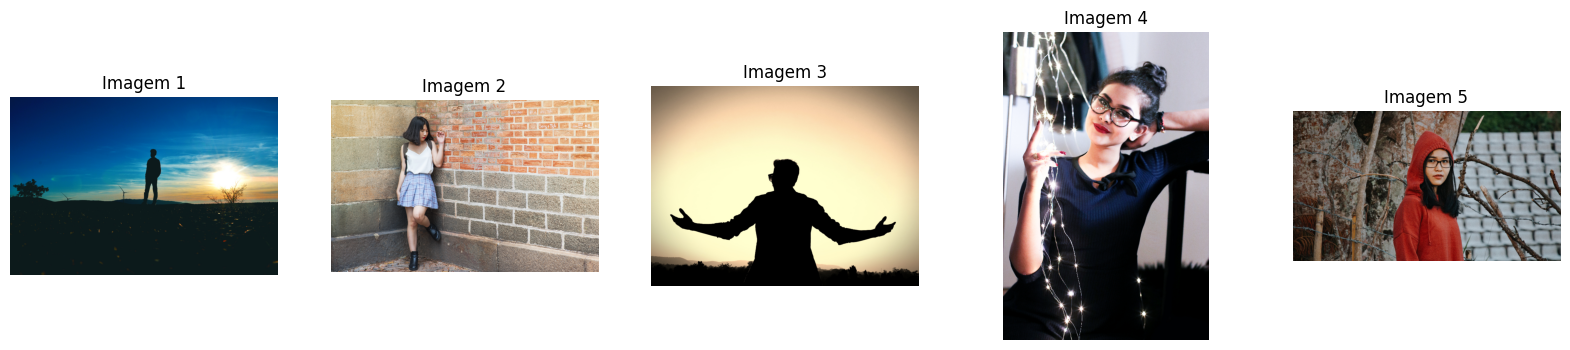

In [13]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Caminho do subdiretório de imagens
images_subdir = '/content/drive/My Drive/Deep Learning/dataset_visao/supervisely_person_clean_2667_img/supervisely_person_clean_2667_img/images'

# Lista de arquivos de imagem no subdiretório
image_files_in_images_subdir = os.listdir(images_subdir)

# Visualiza as primeiras 5 imagens
num_images_to_display = 5
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 4))

for i in range(num_images_to_display):
    img_path = os.path.join(images_subdir, image_files_in_images_subdir[i])
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Oculta os eixos
    axes[i].set_title(f"Imagem {i+1}")

plt.show()




caminho para a parte do dataset onde estão as imagens '/content/drive/My Drive/Deep Learning/dataset_visao/supervisely_person_clean_2667_img/supervisely_person_clean_2667_img/images'